In [1]:
from scipy.integrate import odeint

In [ ]:
def pulse(t,tstart=10,tdur=50):

    if shape(t) == () :
        if (t>tstart) & (t<(tstart+tdur)):
            pulse=1.0
        else:
            pulse=0.0
    else:
        pulse=zeros(shape(t))
        pulse[where((t>tstart) & (t<(tstart+tdur)))]=1.0
    return pulse   

In [ ]:
def ode_model(y,t):
    
    dy=array([  A10*y[1] + A30*(1-y[0]-y[1]-y[2]) - B01*pulse(t)*y[0],
                B01*pulse(t)*y[0] +A21*y[2] - A10*y[1] - A12*y[1] ,
                -A21*y[2] +A12*y[1] -A23*y[2] + B32*(1-y[0]-y[1]-y[2]),
                -B32*(1-y[0]-y[1]-y[2]) - A30*(1-y[0]-y[1]-y[2]) + A23*y[2] ])
        
    return dy

In [ ]:
A12=0.15
A21=0.15
A10=0.25
B01s=logspace(-1,1,10)
#B32s=0.5*BO1s
A23=0.5
A30=0.01

t=linspace(0,100,200)
y0=array([1.,0, 0.])

Imax=[]
Iss=[]

figure(figsize=(10,5))
for B01 in B01s:
    B32=0.5*B01
    v=odeint(ode_model,y0,t)
    subplot(121), plot(t,v[:,1:2])
    Imax.append(max(v[:,1]))
    Iss.append(v[80,1]) 
      

subplot(122),plot(B01s, Imax,'*',B01s,Iss) ;  
#legend(['SState','Max','2 levels model', '3 levels model'],loc=4)
#title(r'S-state current as a function of $I$ ($B_{01}$)')

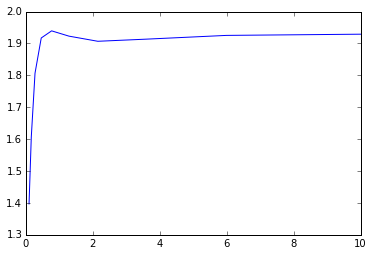

In [11]:
plot(B01s,array(Imax)/array(Iss))